# Introduction Of The Problem Statement

Customer segmentation is the process by which you divide your customers into segments up based on common characteristics – such as demographics or behaviors, so you can market to those customers more effectively.

Customer segmentation is an effective tool for businesses to closely align their strategy and tactics with, and better target, their customers. Every customer is different and every customer journey is different so a single approach often isn’t going to work for all. This is where customer segmentation becomes a valuable process.

Customer segmentation can be broken down into two types:

Segmenting customers based on who they are: the process of understanding who customers are typically focuses on demographc
s.
Segmenting customers based on what they do: you can also segment customers based on how much they spend (share of wallet), how often, and what products (this allows you to see how much you can increase spend). This is more behavior focused. That's the data we have and the kind of segmentation we will 

## Research questi SET-1ons
The information is crafted to facilitate a nuanced analysis of customer preferences, engagement patterns, and satisfaction levels, aiding businesses in making data-driven decisions to enhance the customer experien

1. Demographic-Based Analysis
Gender Distribution: Understanding the proportion of male vs. female customers.
Gender & Age Analysis: Identifying trends in spending behavior across different age groups and genders.
Gender & Membership Type: Examining how membership type preferences vary by gender.

2. Customer Segmentation
Customer Count by Age & Membership Type: Determining which age groups are more likely to opt for premium memberships.
Membership Type Popularity: Analyzing the number of customers in each membership tier.
Membership Type & Total Spend: Studying how spending varies across different membership types.

3. Customer Loyalty & Engagement
Average Membership Duration per Tier: Evaluating how long customers stay subscribed to different membership types.
Days Since Last Purchase Distribution: Understanding the frequency of customer purchases and identifying inactive customers.

4. Customer Satisfaction & Spending Habits
Satisfaction Level vs. Customer Count: Determining how many customers fall into each satisfaction category.
Satisfaction Level & Average Spend: Analyzing if happier customers spend more.
Items Purchased vs. Satisfaction Level: Understanding how the number of items purchased correlates with customer satisfaction.

5. Purchase & Discount Preferences
Items Purchased vs. Gender: Identifying if purchase behavior differs between male and female customers.
Discounts Applied by Gender: Studying whether males or females are more likely to use discounts.

6. Product & Service Experience
Average Rating vs. Satisfaction Level: Examining whether satisfaction levels align with product ratings.ce.

## Research questi SET-2ons
The aim of the study is to answer the below research questions1. :

What is the general saltree\nn2. d?
What is an average cart by cot\nr3. y?
What countries are the most ai\nv4. e?
What are the best selling proc\nt5. s?
How often do customers buy proc\nt6. s?
How many new customers each month7. s?
When do customers tend to purchase products?do.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1.Reading both the datasets

In [6]:
cs = pd.read_csv("unclean_customers.csv")
tn = pd.read_csv("unclean_transactions.csv")

In [7]:
cs.head()

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Satisfaction Level
0,17850.0,NaN,29.0,Los Angeles,Gold,8044.27,443.0,3.07,False,Neutral
1,13047.0,Female,NaN,Houston,Silver,7393.19,415.0,3.29,False,Neutral
2,12583.0,Male,56.0,NaN,NaN,3043.45,395.0,1.52,False,NaN
3,13748.0,NaN,26.0,Miami,Silver,679.77,134.0,4.36,False,Satisfied
4,15100.0,Male,52.0,Los Angeles,Bronze,1511.31,NaN,4.15,NaN,Neutral


In [8]:
cs.shape

(4372, 10)

In [9]:
tn.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6.0,12/1/2010 8:26,3.39,17850.0,NaN
2,NaN,NaN,CREAM CUPID HEARTS COAT HANGER,NaN,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [10]:
tn.shape

(541909, 8)

In [11]:
tn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    487718 non-null  object 
 1   StockCode    487718 non-null  object 
 2   Description  486422 non-null  object 
 3   Quantity     487718 non-null  float64
 4   InvoiceDate  487718 non-null  object 
 5   UnitPrice    487718 non-null  float64
 6   CustomerID   366338 non-null  float64
 7   Country      487718 non-null  object 
dtypes: float64(3), object(5)
memory usage: 33.1+ MB


In [12]:
tn['InvoiceDate'] = pd.to_datetime(tn['InvoiceDate'])
tn['InvoiceDate'].max()

Timestamp('2011-12-09 12:50:00')

# 2.Exploring and Cleaning 

## Customer Dataset

In [15]:
cs.head()

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Satisfaction Level
0,17850.0,NaN,29.0,Los Angeles,Gold,8044.27,443.0,3.07,False,Neutral
1,13047.0,Female,NaN,Houston,Silver,7393.19,415.0,3.29,False,Neutral
2,12583.0,Male,56.0,NaN,NaN,3043.45,395.0,1.52,False,NaN
3,13748.0,NaN,26.0,Miami,Silver,679.77,134.0,4.36,False,Satisfied
4,15100.0,Male,52.0,Los Angeles,Bronze,1511.31,NaN,4.15,NaN,Neutral


In [16]:
cs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4372 entries, 0 to 4371
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer ID         3935 non-null   float64
 1   Gender              3961 non-null   object 
 2   Age                 3935 non-null   float64
 3   City                3964 non-null   object 
 4   Membership Type     3956 non-null   object 
 5   Total Spend         3935 non-null   float64
 6   Items Purchased     3935 non-null   float64
 7   Average Rating      3935 non-null   float64
 8   Discount Applied    3935 non-null   object 
 9   Satisfaction Level  3961 non-null   object 
dtypes: float64(5), object(5)
memory usage: 341.7+ KB


Null values are there so lets check

### Treating Null

In [19]:
(cs.isnull().sum()/len(cs))*100

Customer ID           9.995425
Gender                9.400732
Age                   9.995425
City                  9.332113
Membership Type       9.515096
Total Spend           9.995425
Items Purchased       9.995425
Average Rating        9.995425
Discount Applied      9.995425
Satisfaction Level    9.400732
dtype: float64

Every column here is having null values of around 10% so it's not logical to drop the column instead we can try to impute it . If the null percentage of any column is greater than 30 % or so , we would have dropped that column. But we need to drop the null in the column Customer id.

In [21]:
#percentage of data remaining after dropping nan in customer id
(cs.dropna(subset=['Customer ID']).shape[0]/cs.shape[0])*100  

90.00457456541628

In [22]:
cs = cs.dropna(subset=['Customer ID'])
cs.shape

(3935, 10)

In [23]:
# changing Customer ID datatype to interger
cs['Customer ID'] = cs['Customer ID'].astype('object')

In [24]:
cs.columns

Index(['Customer ID', 'Gender', 'Age', 'City', 'Membership Type',
       'Total Spend', 'Items Purchased', 'Average Rating', 'Discount Applied',
       'Satisfaction Level'],
      dtype='object')

In [25]:
# separating them into numeric and categorical
categ_cols = ['Gender', 'Membership Type','Discount Applied','Satisfaction Level','City']
for cols in categ_cols:
    cs[cols] = cs[cols].fillna(cs[cols].mode()[0])

numerical_cols = ['Age', 'Total Spend', 'Items Purchased', 'Average Rating']
for col in numerical_cols:
    cs[col] = cs[col].fillna(cs[col].median())

In [26]:
# considerin every numeric separately
cs['Age'] = cs['Age'].astype(int) # age can not be float

In [27]:
cs.isnull().sum()

Customer ID           0
Gender                0
Age                   0
City                  0
Membership Type       0
Total Spend           0
Items Purchased       0
Average Rating        0
Discount Applied      0
Satisfaction Level    0
dtype: int64

### Treating Duplicates

In [29]:
# check for customer duplicated
cs.duplicated().sum()

0

In [30]:
cs.duplicated().sum(axis=0)

0

No duplicates are there .

In [32]:
cs.sample(10)
cs.shape

(3935, 10)

So the Customer dataset looks clean to proceed further.

## Transaction dataset

In [35]:
tn.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6.0,2010-12-01 08:26:00,3.39,17850.0,NaN
2,NaN,NaN,CREAM CUPID HEARTS COAT HANGER,NaN,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [36]:
tn['Country'].unique()

array(['United Kingdom', nan, 'France', 'Australia', 'Netherlands',
       'Germany', 'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland',
       'Portugal', 'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [37]:
tn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    487718 non-null  object        
 1   StockCode    487718 non-null  object        
 2   Description  486422 non-null  object        
 3   Quantity     487718 non-null  float64       
 4   InvoiceDate  487718 non-null  datetime64[ns]
 5   UnitPrice    487718 non-null  float64       
 6   CustomerID   366338 non-null  float64       
 7   Country      487718 non-null  object        
dtypes: datetime64[ns](1), float64(3), object(4)
memory usage: 33.1+ MB


### Null Values treatment

In [39]:
tn.isnull().sum()

InvoiceNo       54191
StockCode       54191
Description     55487
Quantity        54191
InvoiceDate     54191
UnitPrice       54191
CustomerID     175571
Country         54191
dtype: int64

In [40]:
tn = tn.dropna(subset=['CustomerID'])
tn['CustomerID'] = tn['CustomerID'].astype('object')

In [41]:
(tn.isnull().sum()/tn.shape[0])*100

InvoiceNo       9.941912
StockCode      10.042911
Description     9.988863
Quantity        9.975487
InvoiceDate    10.003876
UnitPrice      10.007698
CustomerID      0.000000
Country         9.995141
dtype: float64

In [42]:
tn = tn.drop(columns = ['Country'])

In [43]:
tn.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID'],
      dtype='object')

In [44]:
# considering each col separatelhy
tn = tn.dropna(subset=['InvoiceNo','InvoiceDate'])

# categorical columns
catg_cols = ['Description','StockCode']
for col in ['Description', 'StockCode']:
    tn[col] = tn[col].fillna(tn[col].mode()[0])

# numerical columns
num_col = ['Quantity','UnitPrice']
for cols in num_col:
    tn[cols] = tn[cols].fillna(tn[cols].mode()[0])

In [45]:
tn.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
dtype: int64

In [46]:
# we will not drop these duplicated data because it is a transaction data many customers have made payments no . of time 
tn['CustomerID'].duplicated().sum()

292714

### Outlier Treatment

In [48]:
# total price col
tn['Total Price'] = tn['UnitPrice']*tn['Quantity']
tn.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Total Price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2010-12-01 08:26:00,2.55,17850.0,15.30
1,536365,71053,WHITE METAL LANTERN,6.0,2010-12-01 08:26:00,3.39,17850.0,20.34
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,2010-12-01 08:26:00,3.39,17850.0,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,2010-12-01 08:26:00,3.39,17850.0,20.34
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2.0,2010-12-01 08:26:00,7.65,17850.0,15.30


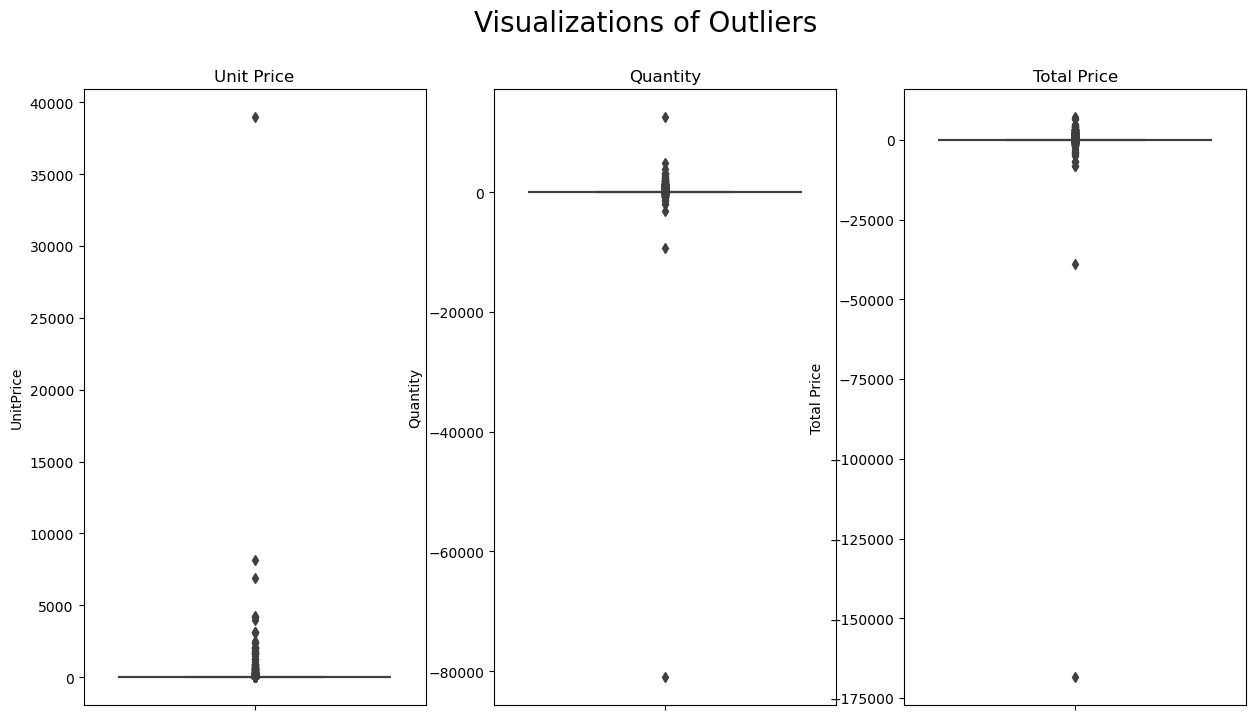

In [49]:
fig,axes = plt.subplots(1,3,figsize=(15,8))
fig.suptitle("Visualizations of Outliers",size = 20)

sns.boxplot(data = tn,y = "UnitPrice",ax = axes[0])
axes[0].set_title("Unit Price")

sns.boxplot(data = tn , y = "Quantity" , ax = axes[1])
axes[1].set_title("Quantity")

sns.boxplot(data = tn , y = "Total Price", ax = axes[2])
axes[2].set_title("Total Price")

plt.show()

In [50]:
tn.shape

(297058, 8)

From the above observation, unit price column can have some items very costly so they sholud not be removed similarly there ccan be some whole sale buyers who have purchased a lot . But outlier from the total price should be remove so that we take into account of behaviour of regular buyer not hungry buyers.

In [52]:
from scipy import stats

# removing outliers from total Price the empirical rule: ~99.7% of normally distributed data falls within 3 standard deviations.
tn = tn[(np.abs(stats.zscore(tn[["Total Price"]])) < 3).all(axis=1)]

# IQR Method
q1 = tn['Total Price'].quantile(0.25)
q3 = tn['Total Price'].quantile(0.75)
IQR = q3-q1

#tn = tn[(tn["Total Price"] >= q1 - 1.5*IQR) & (tn["Total Price"] <= q3 + 1.5 * IQR)]

In [53]:
tn.shape

(296822, 8)

In [54]:
# this need to be clean to contain either male or female
cs['Gender'] = cs['Gender'].str.replace(r".*(Male).*","Male",regex = True)
cs['Gender'] = cs['Gender'].str.replace(r".*(Female).*","Female",regex = True)
cs['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [55]:
cs['Membership Type'].unique()
cs['Membership Type']=cs['Membership Type'].str.replace(r".*(Gold).*","Gold",regex=True)
cs['Membership Type']=cs['Membership Type'].str.replace(r".*(Silver).*","Silver",regex=True)
cs['Membership Type']=cs['Membership Type'].str.replace(r".*(Bronze).*","Bronze",regex=True)

In [56]:
cs.sample(6)

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Satisfaction Level
2721,17521.0,Male,35,Los Angeles,Gold,4937.99,242.0,2.50,False,Unsatisfied
2143,17719.0,Male,27,Chicago,Gold,4989.52,107.0,4.20,False,Satisfied
3880,15006.0,Female,32,New York,Silver,553.75,149.0,1.91,False,Neutral
660,15503.0,Female,31,New York,Silver,2536.38,301.0,1.95,True,Unsatisfied
398,13564.0,Female,64,Miami,Gold,790.88,157.0,3.72,True,Neutral
582,16519.0,Female,21,Chicago,Gold,4496.24,150.0,3.07,True,Unsatisfied


# 3.EDA Exploratory Data Analysis

## 3.1 Demographic-Based Analysis 

###  Gender Distribution: Understanding the proportion of male vs. female customers. 

In [60]:
gender = cs['Gender'].value_counts().reset_index()
gender

,Gender,count
0,Female,2198
1,Male,1737


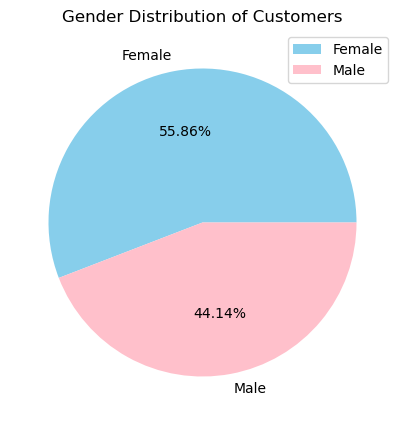

In [61]:
plt.figure(figsize=(5,5))
plt.pie(gender['count'],labels =gender['Gender'],colors = ['skyblue','pink'],autopct = '%1.2f%%')
plt.legend()
plt.title("Gender Distribution of Customers")
plt.show()

There are slightly around (10%) more female customers than males.

### Gender and age

In [64]:
gen_with_age = cs.groupby('Gender')['Age'].value_counts().reset_index()
gen_with_age

# converting age to age group bins 
gen_with_age['Age'].max()
bins = [18, 25, 35, 45, 55, 65, 75]
labels = ["18-25", "25-35", "35-45", "45-55", "55-65","65-75"] 
gen_with_age['Age_group'] = pd.cut(gen_with_age['Age'],bins = bins , labels = labels , right= False)
gen_with_age

,Gender,Age,count,Age_group
0,Female,44,270,35-45
1,Female,62,55,55-65
2,Female,34,54,25-35
3,Female,47,49,45-55
4,Female,30,47,25-35
...,...,...,...,...
99,Male,48,23,45-55
100,Male,51,22,45-55
101,Male,67,22,65-75
102,Male,68,20,65-75


In [65]:
gen_age = gen_with_age.groupby(["Gender", "Age_group"],observed = True).size().reset_index(name="Count")
gen_age

,Gender,Age_group,Count
0,Female,18-25,7
1,Female,25-35,10
2,Female,35-45,10
3,Female,45-55,10
4,Female,55-65,10
5,Female,65-75,5
6,Male,18-25,7
7,Male,25-35,10
8,Male,35-45,10
9,Male,45-55,10


C:\Users\HP\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


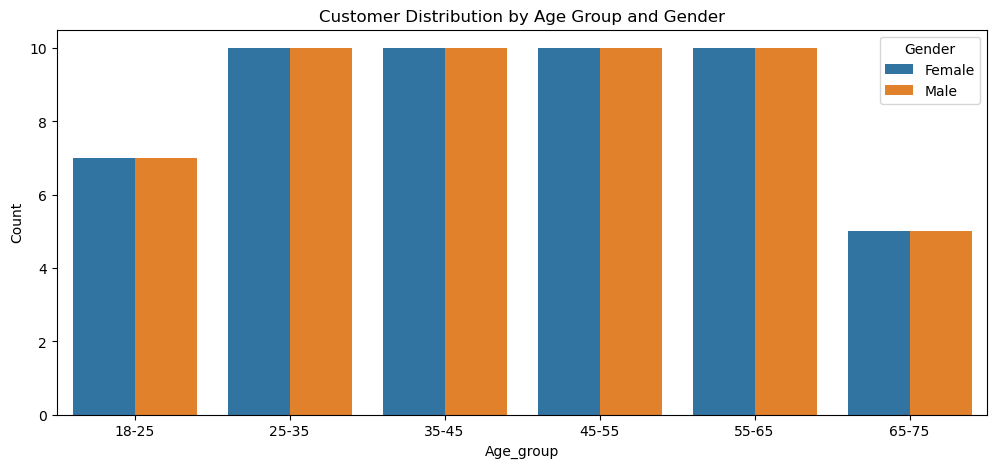

In [66]:
plt.figure(figsize = (12,5))
sns.barplot(data= gen_age,x="Age_group",y = "Count", hue = "Gender")
plt.title("Customer Distribution by Age Group and Gender")
plt.show()

Most of the Customers are in the age group of 25-65 . Means College goers and senior citizens do not form the major customer Base.

### Gender with City

In [69]:
gen_with_city = cs.groupby('Gender')['City'].value_counts().reset_index()
gen_with_city

,Gender,City,count
0,Female,Los Angeles,611
1,Female,Miami,392
2,Female,New York,389
3,Female,Chicago,365
4,Female,Houston,352
5,Female,Los Angeles-,9
6,Female,Miami_,8
7,Female,Chicago-,7
8,Female,Houston1,5
9,Female,Los Angeles1,5


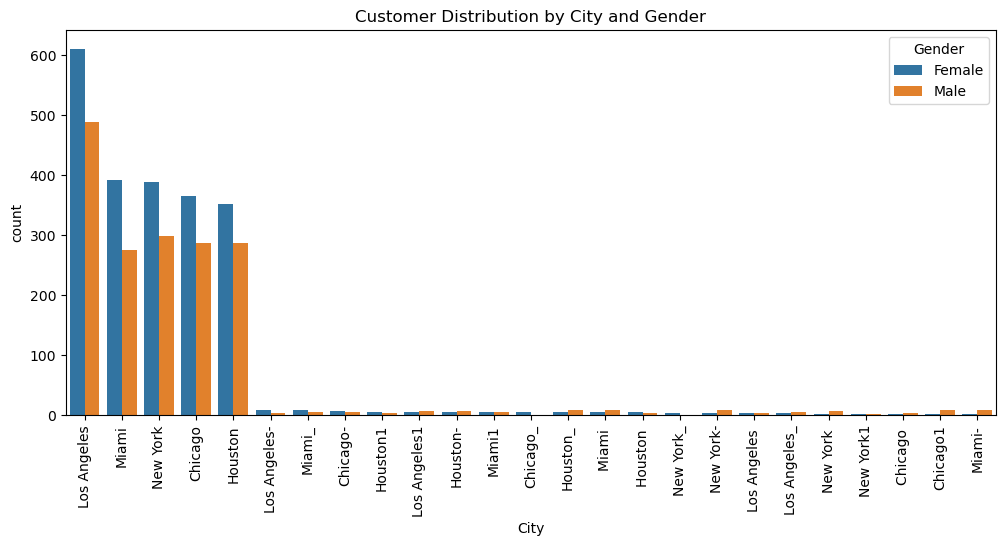

In [70]:
plt.figure(figsize = (12,5))
sns.barplot(data= gen_with_city,x="City",y = "count", hue = "Gender")
plt.title("Customer Distribution by City and Gender")
plt.xticks(rotation=90)
plt.show()

### Gender & Membership Type: Examining how membership type preferences vary by gender.


In [81]:
gen_with_membership = cs.groupby('Gender')['Membership Type'].value_counts().reset_index()
gen_with_membership

,Gender,Membership Type,count
0,Female,Gold,883
1,Female,Bronze,666
2,Female,Silver,649
3,Male,Gold,699
4,Male,Silver,543
5,Male,Bronze,495


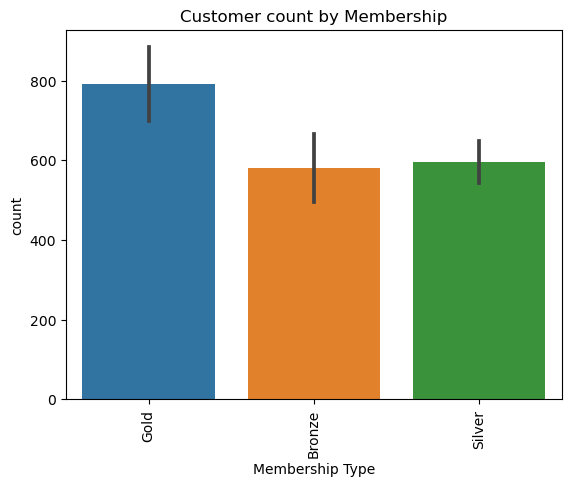

In [83]:
sns.barplot(data=gen_with_membership,x='Membership Type', y='count')
plt.xticks(rotation = 90)
plt.title("Customer count by Membership")
plt.show()

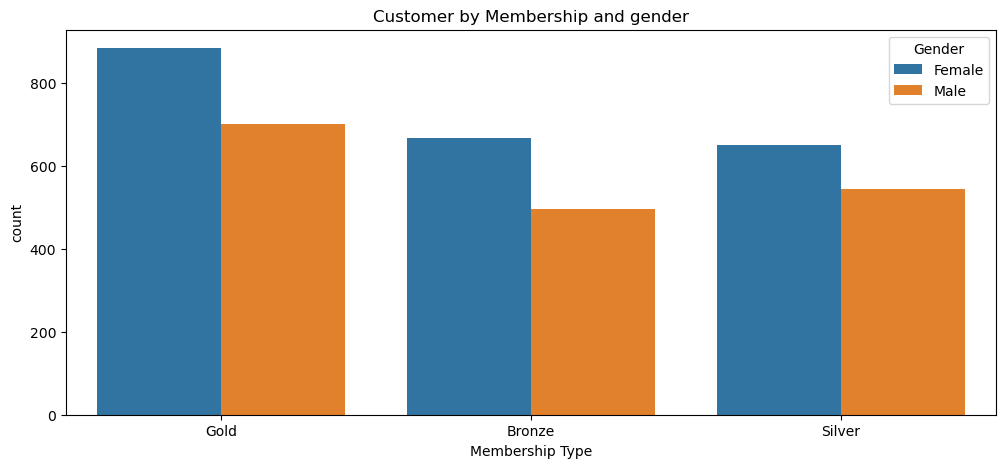

In [85]:
plt.figure(figsize=(12,5))
sns.barplot(data = gen_with_membership,x ="Membership Type",y = "count",hue="Gender")
plt.title("Customer by Membership and gender")
plt.show()

# EDA SET-2

### What is the general sales trend?

In [87]:
tn.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Total Price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2010-12-01 08:26:00,2.55,17850.0,15.30
1,536365,71053,WHITE METAL LANTERN,6.0,2010-12-01 08:26:00,3.39,17850.0,20.34
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,2010-12-01 08:26:00,3.39,17850.0,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,2010-12-01 08:26:00,3.39,17850.0,20.34
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2.0,2010-12-01 08:26:00,7.65,17850.0,15.30


In [77]:
tn.head()
cs.head()

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Satisfaction Level
0,17850.0,Female,29,Los Angeles,Gold,8044.27,443.0,3.07,False,Neutral
1,13047.0,Female,44,Houston,Silver,7393.19,415.0,3.29,False,Neutral
2,12583.0,Male,56,Los Angeles,Gold,3043.45,395.0,1.52,False,Unsatisfied
3,13748.0,Female,26,Miami,Silver,679.77,134.0,4.36,False,Satisfied
4,15100.0,Male,52,Los Angeles,Bronze,1511.31,242.0,4.15,True,Neutral


In [95]:
# amount of money generated by the sales for each day through the studied period.
general_trend = pd.DataFrame(data={'Date': pd.to_datetime(tn.InvoiceDate).dt.date,
                 'TotalPrice':tn.Quantity*tn.UnitPrice})

In [105]:
 general_trend = general_trend.groupby('Date')['TotalPrice'].sum()
general_trend = pd.DataFrame(general_trend)
general_trend

,TotalPrice
Date,
2010-12-01,29574.14
2010-12-02,26924.66
2010-12-03,13303.56
2010-12-05,20331.45
2010-12-06,17861.16
...,...
2011-12-05,37530.46
2011-12-06,25920.55
2011-12-07,32169.96


In [123]:
from datetime import datetime
dates = []
dates.append(pd.to_datetime("201012",format = "%Y%m"))
dates += [pd.to_datetime(f"2011{month:02}",format = "%Y%m") for month in range(1,12)]
dates

[Timestamp('2010-12-01 00:00:00'),
 Timestamp('2011-01-01 00:00:00'),
 Timestamp('2011-02-01 00:00:00'),
 Timestamp('2011-03-01 00:00:00'),
 Timestamp('2011-04-01 00:00:00'),
 Timestamp('2011-05-01 00:00:00'),
 Timestamp('2011-06-01 00:00:00'),
 Timestamp('2011-07-01 00:00:00'),
 Timestamp('2011-08-01 00:00:00'),
 Timestamp('2011-09-01 00:00:00'),
 Timestamp('2011-10-01 00:00:00'),
 Timestamp('2011-11-01 00:00:00')]

In [127]:
rolling_days = general_trend.copy()
rolling_days["TotalPrice"] = rolling_days["TotalPrice"].rolling(window=30).mean()

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

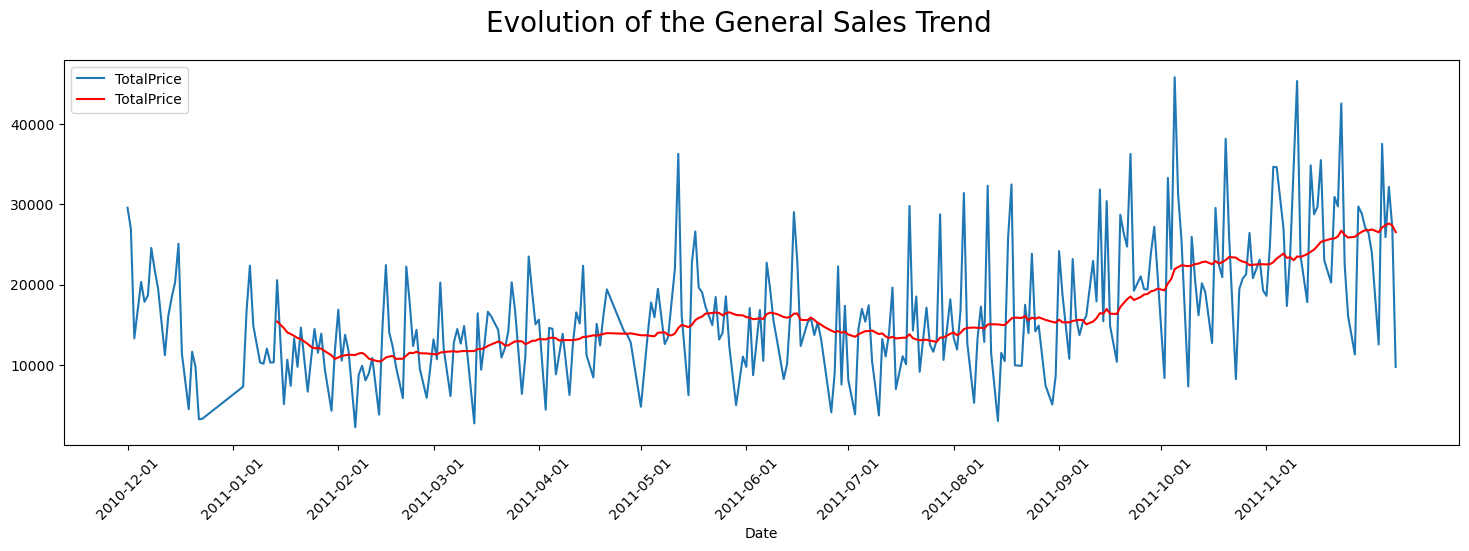

In [129]:
plt.figure(figsize=(18,5))
plt.suptitle('Evolution of the General Sales Trend', fontsize=20)
sns.lineplot(data = general_trend)
sns.lineplot(data = rolling_days,palette = ['red'])
plt.xticks(dates,rotation = 45)
plt.show()

# RFM Analysis

RFM analysis is a marketing technique used to quantitatively rank and group customers based on the recency, frequency and monetary total of their recent transactions to identify the best customers and perform targeted marketing campaigns. The system assigns each customer numerical scores based on these factors to provide an objective analysis. RFM analysis is based on the marketing adage that "80% of your business comes from 20% of your customers."

RFM analysis ranks each customer on the following factors:

Recency. How recent was the customer's last purchase? Customers who recently made a purchase will still have the product on their mind and are more likely to purchase or use the product again. Businesses often measure recency in days. But, depending on the product, they may measure it in years, weeks or even hours.

Frequency. How often did this customer make a purchase in a given period? Customers who purchased once are often are more likely to purchase again. Additionally, first time customers may be good targets for follow-up advertising to convert them into more frequent customers.

Monetary. How much money did the customer spend in a given period? Customers who spend a lot of money are more likely to spend money in the future and have a high value to a business.

In [117]:
import datetime as dt
today_date = dt.datetime(2011,12,31)

In [119]:
tn.sample()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Total Price
31445,538968,85123A,TV DINNER TRAY DOLLY GIRL,3.0,2010-12-15 11:34:00,4.95,15384.0,14.85


In [121]:
cs.sample()

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Satisfaction Level
3013,15007.0,Male,29,Houston,Bronze,3764.62,40.0,3.94,False,Unsatisfied


In [125]:
rfm = tn.groupby('CustomerID').agg({'InvoiceDate':lambda InvoiceDate: (today_date - InvoiceDate.max()).days,
                                  'InvoiceNo': lambda InvoiceNO:InvoiceNO.nunique(),
                                   'Total Price': lambda TotalPrice:TotalPrice.sum()})
rfm.columns = ['Recency','Frequency','Monetary']

Customers with lower recency values are more recent (and typically more valuable).
Higher frequency means the customer buys more often.
Customers who spend more are typically more valuable.

In [131]:
# assigning different scores according to importancce 

rfm['Recency_score'] = pd.cut(rfm['Recency'],5,labels = [5,4,3,2,1])
# high score to low recent values since they are more recent

# high frequency score gets rank 1 
rfm['frequency_rank'] = rfm['Frequency'].rank(method='first', ascending=False)
# high frequncy and rank 1 will get high score as 5
rfm['frequency_score'] = pd.qcut(rfm['frequency_rank'], 5, labels=[5, 4, 3, 2, 1])

# the one with low monetary value will get low score 
rfm["monetary_score"] = pd.qcut(rfm['Monetary'], 5, labels=[1, 2, 3, 4, 5])

rfm['RFM Score'] = (rfm['Recency_score'].astype(str)+rfm['frequency_score'].astype(str))

In [135]:
seg_map = {
    r'[1-2][1-2]': 'hibernating',
    r'[1-2][3-4]': 'at_Risk',
    r'[1-2]5': 'cant_loose',
    r'3[1-2]': 'about_to_sleep',
    r'33': 'need_attention',
    r'[3-4][4-5]': 'loyal_customers',
    r'41': 'promising',
    r'51': 'new_customers',
    r'[4-5][2-3]': 'potential_loyalists',
    r'5[4-5]': 'champions'
}
rfm['segment'] = rfm['RFM Score'].replace(seg_map, regex=True)
rfm.reset_index(inplace=True)
rfm.head()

,CustomerID,Recency,Frequency,Monetary,Recency_score,frequency_rank,frequency_score,monetary_score,RFM Score,segment
0,12347.0,23,7,2793.51,5,687.0,5,5,55,champions
1,12348.0,96,4,1242.38,4,1313.0,4,4,44,loyal_customers
2,12349.0,39,1,1299.55,5,2987.0,2,4,52,potential_loyalists
3,12350.0,331,1,217.35,1,2988.0,2,2,12,hibernating
4,12352.0,57,11,768.75,5,362.0,5,4,55,champions


Count of each segment

In [137]:
segments_count = rfm.groupby("segment").agg({"CustomerID": "count"})
segments_count.reset_index(inplace= True)
segments_count.columns = ['Segment','Count']
segments_count.head()

,Segment,Count
0,about_to_sleep,233
1,at_Risk,121
2,cant_loose,5
3,champions,1477
4,hibernating,506


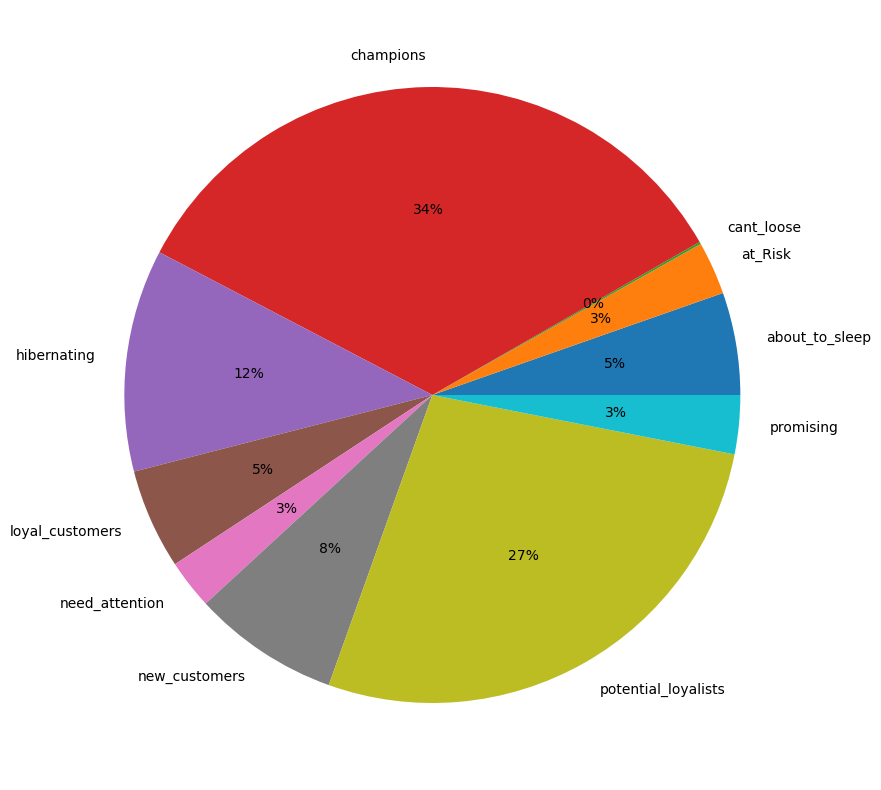

In [139]:
plt.figure(figsize=(20,10))
plt.pie(segments_count["Count"],labels = segments_count["Segment"],autopct='%.0f%%')
plt.show()

In [143]:
agg_list=["mean", "count", "max"]
rfm[["segment", "Recency", "Frequency", "Monetary"]].groupby("segment").agg(agg_list)

Recency             Frequency                Monetary  \
                           mean count  max       mean count  max         mean   
segment                                                                         
about_to_sleep       207.815451   233  243   1.236052   233    2   265.696266   
at_Risk              300.314050   121  390   2.669421   121    6   385.857355   
cant_loose           305.800000     5  323  13.600000     5   33  2319.638000   
champions             42.111713  1477   95  10.394042  1477  237  2691.495207   
hibernating          319.709486   506  394   1.098814   506    2   193.295870   
loyal_customers      146.771930   228  240   5.570175   228   19  1033.719298   
need_attention       203.410714   112  243   2.508929   112    3   408.501527   
new_customers         59.068862   334   95   1.000000   334    1   209.035090   
potential_loyalists   72.367313  1187  170   2.085088  1187    3   441.598104   
promising            126.522388   134  170   1.000000   134    1   263.634410   

                                       
                    count         max  
segment                                
about_to_sleep        233    5662.440  
at_Risk               121    2823.800  
cant_loose              5    4829.650  
champions            1477  173718.360  
hibernating           506    1804.550  
loyal_customers       228    6937.870  
need_attention        112    2145.421  
new_customers         334    1266.380  
potential_loyalists  1187    5474.090  
promising             134    2100.240